


# **Day 3: Supervised Machine Learning on NSL-KDD Dataset**

This notebook covers:
- Data Cleaning
- Data Transformation (Encoding + Scaling)
- PCA for Dimensionality Reduction
- Supervised ML Models: Logistic Regression, Random Forest, XGBoost, Neural Network
- Optional: CNN for time-series modeling
- Evaluation Metrics

# **📦 Install Dependencies**
- Seaborn is used for creating visually appealing and informative statistical graphics with ease, especially when working with Pandas DataFrames.
- Matplotlib is used for generating a wide range of static, animated, and interactive 2D plots in Python.
- Scikit-learn is used for implementing machine learning algorithms, data preprocessing, model evaluation, and building predictive models.

In [82]:
pip install xgboost scikit-learn pandas matplotlib seaborn tensorflow

# **📥 Load Dataset**
To load the NSL-KDD dataset from a CSV file into a Pandas DataFrame and examine its size, column names, and sample records.

In [83]:
import pandas as pd

df = pd.read_csv('NSL_KDD_master.csv')
df.shape, df.columns, df.head()

((125972, 45),
 Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
        'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
        'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
        'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
        'num_access_files', 'num_outbound_cmds', 'is_host_login',
        'is_guest_login', 'count', 'srv_count', 'serror_rate',
        'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
        'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
        'dst_host_srv_count', 'dst_host_same_srv_rate',
        'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
        'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
        'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate', 'attack', 'level', 'attack_flag',
        'attack_map'],
       dtype='object'),
    duration protocol_type  service flag  src_bytes  dst_bytes  land  \


# **🧹 Data Cleaning**
Common Methods
1. Handling Missing Values
2. Removing Duplicates
3. Convert data types
4. Standardizing Column Nammes
5. Encoding Categorical Variables -- Label Encoding or One-Hot Encoding
6. Outlier Detection and Removal
7. Feature Scaling
8. Dropping Unnecessary Columns

In [84]:
print (f"Missing Values"+"\n" + "-"*20)

#sum of null values per column
df.isnull().sum()

Missing Values
--------------------


,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [85]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

df = df.dropna()

Number of duplicate rows: 0


In [86]:
# Data Integrity Verification

# Check for abnormalities in the 'duration' column
abnormal_duration = df[(df['duration'] < 0)]

# Output the abnormal duration for review
print("Abnormal Duration:")
print(abnormal_duration)

Abnormal Duration:
Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, attack, level, attack_flag, attack_map]
Index: []

[0 rows x 45 columns]


# **📌 Target Variable Distribution**
What is the Target Variable?
- The target variable in this classification task is attack_flag, which indicates whether a network connection record is normal (0) or an attack (1)
- It uses .value_counts() to count the number of occurrences of each class:
  - 0 = Normal Traffic
  - 1 = Attack Traffic

In [87]:
# Target Variable Distribution of the output
Target_Y = df['attack_flag']
Target_Y.value_counts()

# Output (0 = Normal, 1 = Attack)

,count
attack_flag,
0,67342
1,58630


# **Group Summary Statistics by Class**
Objective: To understand how the feature dst_host_serror_rate behaves across different classes of the attack_flag target variable

- ['dst_host_serror_rate'].describe(): Provides descriptive statistics (count, mean, std, min, quartiles, max) for each group

Why it is Useful:
- Helps identify whether a feature (like dst_host_serror_rate) is potentially discriminative.
- Significant differences in mean or standard deviation between groups could indicate this feature is valuable for classification.

In [88]:
# Assuming 'df' is your DataFrame
# Grouping by 'attack_flag' and describing 'dst_host_serror_rate'
category_stats = df.groupby('attack_flag')['dst_host_serror_rate'].describe()

# Display the result
print(category_stats)

               count      mean       std  min  25%  50%  75%  max
attack_flag                                                      
0            67342.0  0.013930  0.092007  0.0  0.0  0.0  0.0  1.0
1            58630.0  0.595177  0.484495  0.0  0.0  1.0  1.0  1.0


In [89]:
# Compute the full correlation matrix (numerical features only)
correlation_matrix = df.corr(numeric_only=True)

# Correlation of all features with the target
correlation_with_target = correlation_matrix['attack_flag'].sort_values(ascending=False)

# Display the top 10 positively correlated features
print("Top positively correlated features with attack_flag:")
print(correlation_with_target.head(10))

# Display the top 10 negatively correlated features
print("\nTop negatively correlated features with attack_flag:")
print(correlation_with_target.tail(10))

Top positively correlated features with attack_flag:
attack_flag                 1.000000
attack_map                  0.861122
dst_host_srv_serror_rate    0.654984
dst_host_serror_rate        0.651840
serror_rate                 0.650651
srv_serror_rate             0.648287
count                       0.576442
dst_host_count              0.375051
srv_rerror_rate             0.253502
dst_host_srv_rerror_rate    0.253428
Name: attack_flag, dtype: float64

Top negatively correlated features with attack_flag:
su_attempted             -0.022449
num_access_files         -0.036701
is_guest_login           -0.039280
srv_diff_host_rate       -0.119380
level                    -0.379707
logged_in                -0.690181
dst_host_same_srv_rate   -0.693813
dst_host_srv_count       -0.722546
same_srv_rate            -0.751912
num_outbound_cmds              NaN
Name: attack_flag, dtype: float64


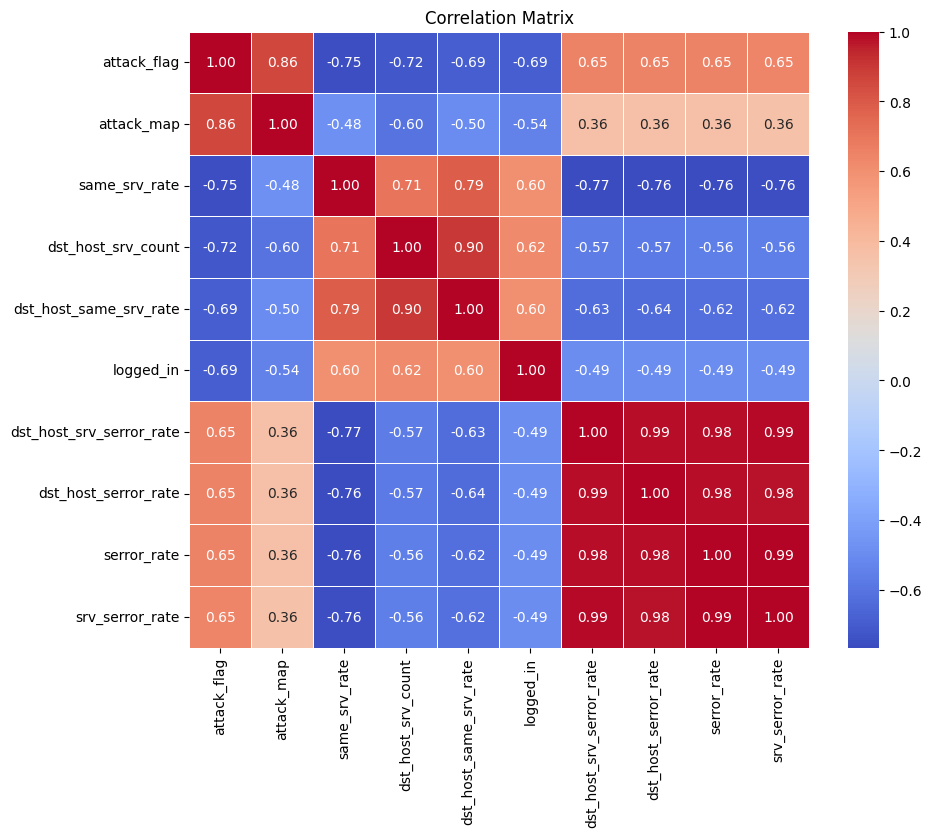

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (numeric features only)
correlation_matrix = df.corr(numeric_only=True)

# Get correlation of all features with the target variable
correlation_with_target = correlation_matrix['attack_flag'].sort_values(ascending=False)

# Select top 10 features (absolute correlation)
top_features = correlation_with_target.abs().sort_values(ascending=False).head(10).index

# Create heatmap for top correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Feature Correlation Analysis with attack_flag**

As part of the exploratory data analysis, we computed the correlation matrix of all numerical features with the binary target variable attack_flag, where 0 indicates normal network traffic and 1 indicates an attack.

The primary goal of this notebook is to build and evaluate machine learning models for detecting network intrusions using the NSL-KDD dataset.
- The task is framed as a binary classification problem:
- attack_flag = 0 → Normal traffic
- attack_flag = 1 → Malicious traffic (any kind of attack)

The following features were identified as the *most highly potentially* correlated (positively or negatively) with attack_flag:

1. dst_host_srv_count
  - Definition: Number of connections to the same service as the current connection in the past two seconds, to the same destination host.
  - Correlation Insight: This feature is positively correlated with attack instances, especially for attacks like Denial-of-Service (DoS), where multiple connections are rapidly attempted to the same service.

2. dst_host_same_srv_rate
  - Definition: Percentage of connections to the same service among all connections to the same host.
  - Correlation Insight: Shows strong positive correlation with attacks. Attackers often target a specific service repeatedly, increasing this rate during an attack.

3. logged_in
  - Definition: Boolean feature indicating whether the user has successfully logged in (1) or not (0).
  - Correlation Insight: Negatively correlated with attacks. Many attacks, particularly brute force or scanning types, do not result in a successful login, hence this feature serves as a useful discriminator.

4. dst_host_srv_serror_rate
  - Definition: Percentage of connections to the same service that have SYN errors (connection attempts that fail).
  - Correlation Insight: Strong positive correlation with attacks. In DoS and port scan attacks, failed connection attempts are common, increasing this error rate.


---



Why Use attack_flag as the Target Variable?
- **Simplicity & Interpretability**:
Using attack_flag simplifies the classification problem and allows for quicker experimentation and easier interpretation of model performance.
- **Effective for Intrusion Detection**:
In many real-world applications, distinguishing between “normal” and “attack” traffic is the first and most critical step in network security.
- **Balanced View**:
Although the dataset is slightly imbalanced, attack_flag is suitable for building and comparing multiple machine learning and deep learning models.


# **Label Encoding & Scaling**
To convert categorical (non-numeric) labels into numeric form so they can be used by machine learning algorithms


**Label Encoding** (Ordinal)
- Assigns each unique category a number
- e.g., 'normal' -> 1, 'attack' -> 0

**One-Hot Encoding** (Nominal)
- Creates new binary columns for each category
- Use when categories have no order (e.g., protocol type: TCP, UDP, ICMP)

**Feature Scaling**
To bring all numeric features into the same scale, usually between 0-1 or mean=0, std=1.


In [91]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop(['attack_flag'], axis=1)
y = df['attack_flag']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,2,44,9,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,11,15,0,0
1,0,1,49,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,9,19,1,1
2,0,1,24,9,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,11,21,0,0
3,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,11,21,0,0
4,0,1,49,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,9,21,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,9,20,1,1
125968,8,2,49,9,105,145,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,11,21,0,0
125969,0,1,54,9,2231,384,0,0,0,0,...,0.00,0.00,0.72,0.00,0.01,0.00,11,18,0,0
125970,0,1,30,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,9,20,1,1


# **🔻 Dimensionality Reduction (PCA)**
To reduce the number of input features (dimensions) while preserving as much important information (variance) in the dataset as possible.

Why Use PCA?
- Improve model performance and training time
- Reduce overfitting
- Visualize high-dimensional data (2D or 3D)
- Handle multicollinearity (correlated features)


In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance:", sum(pca.explained_variance_ratio_))

Explained Variance: 0.8775582025555881


# 🔀 Train-Test Split

To split the dataset into training and testing subsets so that we can:
- Train the model on one part (training set)
- Evaluate its performance on unseen data (test set)

Gives a more realistic evaluation of how your model performs on new data
Ensures that your model generalizes well and is not just memorizing the data

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify = y, test_size=0.2, random_state=42)

# 🤖 Train Models
Training a model means learning patterns from labeled data to generalize to unseen data

Why it's important:
1. Pattern Learning -- Models learn how input features relate to the target variable
2. Generalization -- We want the model to perform well not just on training data, but also on new, unseen data
3. Prediction -- Once trained, models can make real-time predictions automatically (e.g., spam filtering)


# 1. Logistic Regression
Logistic Regression is a supervised machine learning algorithm used for binary classification tasks. Despite the name, it’s actually a classification model, not a regression model.

It predicts the probability that an input belongs to a particular category (e.g., 0 or 1) using the logistic (sigmoid) function.

Low C (strong regularization) → high bias (underfitting)
- High C (weak regularization) → low bias but possibly high variance (overfitting)
- The best C balances bias and variance (good generalization on test set)

In [94]:
!pip install joblib # Save and Load the Model

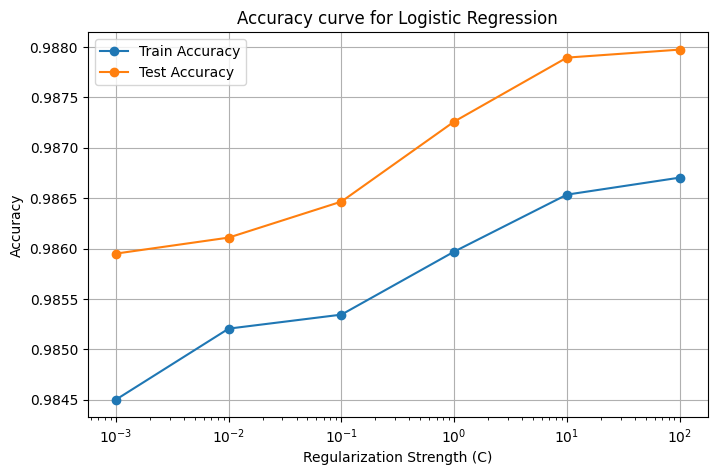

Best C value: 100
Best Test Accuracy: 0.9880


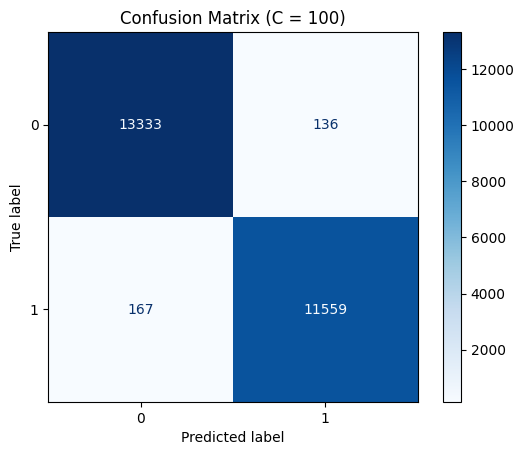

['best_logistic_model.pkl']

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# List of C values to test
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_accuracy_scores = []
test_accuracy_scores = []
log_models_list = []

# Train model for each C value
for c in C_values:
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)

    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)

    train_accuracy_scores.append(accuracy_score(y_train, y_train_pred))
    test_accuracy_scores.append(accuracy_score(y_test, y_test_pred))

    log_models_list.append(lr)

# Plot Bias-Variance Tradeoff
plt.figure(figsize=(8, 5))
plt.plot(C_values, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(C_values, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.xscale('log')  # Because C values vary exponentially
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# Identify the best model (based on highest test accuracy)
best_index = np.argmax(test_accuracy_scores)
best_C = C_values[best_index]
best_model = log_models_list[best_index]

print(f"Best C value: {best_C}")
print(f"Best Test Accuracy: {test_accuracy_scores[best_index]:.4f}")

# Plot Confusion Matrix for best model
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title(f'Confusion Matrix (C = {best_C})')
plt.show()

# Save the model to a file
joblib.dump(best_model, 'best_logistic_model.pkl')

# 2. Random Forest
Random Forest is an ensemble learning algorithm primarily used for classification and regression tasks. It builds multiple decision trees and merges them to get a more accurate and stable prediction.

How It Works

1.	Bagging (Bootstrap Aggregation):
  - Random Forest creates multiple decision trees using random subsets of the training data (with replacement)
  - This helps reduce variance and avoid overfitting
2.	Random Feature Selection:
	- At each split in a tree, a random subset of features is considered, not all
	- This ensures the trees are decorrelated, improving generalization
3.	Majority Voting (for Classification):
	- Each tree gives a classification
	- The final prediction is based on majority vote from all the trees



In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# List of max_depth values to test
max_depth_values = [2, 4, 6, 8, 10, 12, 14, 16]
train_accuracy_scores = []
test_accuracy_scores = []
rf_models_list = []

# Train model for each max_depth
for depth in max_depth_values:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    train_accuracy_scores.append(accuracy_score(y_train, y_train_pred))
    test_accuracy_scores.append(accuracy_score(y_test, y_test_pred))

    rf_models_list.append(rf)

# Identify the best model (based on highest test accuracy)
best_index = np.argmax(test_accuracy_scores)
best_depth = max_depth_values[best_index]
best_rf_model = rf_models_list[best_index]

print(f"Best max_depth: {best_depth}")
print(f"Best Test Accuracy: {test_accuracy_scores[best_index]:.4f}")

# Save the best model
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')


Best max_depth: 12
Best Test Accuracy: 0.9999


['best_random_forest_model.pkl']

Best max_depth: 12
Best Test Accuracy: 0.9999


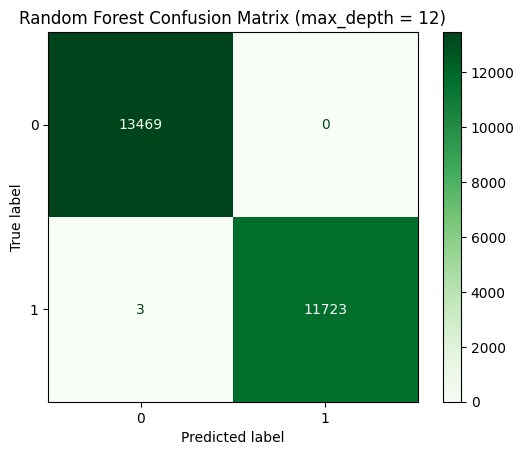

In [97]:
# Identify the best max_depth (based on test accuracy)
best_index = np.argmax(test_accuracy_scores)
best_depth = max_depth_values[best_index]
best_rf_model = rf_models_list[best_index]

print(f"Best max_depth: {best_depth}")
print(f"Best Test Accuracy: {test_accuracy_scores[best_index]:.4f}")

# Plot Confusion Matrix for the best model
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, cmap='Greens')
plt.title(f'Random Forest Confusion Matrix (max_depth = {best_depth})')
plt.show()

The confusion matrix shows excellent performance by the Random Forest model with max_depth = 12. Let’s break it down and then address overfitting or underfitting concerns.

- True Negatives (TN): 13,469 → normal classified as normal
- False Positives (FP): 0 → no normal misclassified as attack
- False Negatives (FN): 3 → only 3 attacks misclassified as normal
- True Positives (TP): 11,723 → attack correctly identified




# 3. XGBoost
XGBoost (Extreme Gradient Boosting) is an optimized, distributed gradient boosting library designed to be:
- Highly efficient
- Flexible
- Portable

It implements machine learning algorithms under the Gradient Boosting framework, and it’s known for its high performance, especially in structured/tabular data.

**How It Works**

XGBoost builds trees sequentially, where each new tree corrects the errors of the previous one by minimizing a loss function (like log loss or MSE) using gradient descent.

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import xgboost as xgb
import joblib
import numpy as np

# Range of n_estimators to try
n_estimators_list = [10, 15, 20, 25, 30, 35, 40]
train_accuracy_scores = []
test_accuracy_scores = []
xgb_models_list = []

# Train XGBoost models with different n_estimators
for n in n_estimators_list:
    xgb_model = xgb.XGBClassifier(
        n_estimators=n,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    xgb_model.fit(X_train, y_train)

    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)

    train_accuracy_scores.append(accuracy_score(y_train, y_train_pred))
    test_accuracy_scores.append(accuracy_score(y_test, y_test_pred))

    xgb_models_list.append(xgb_model)

# Identify the best model based on highest test accuracy
best_index = np.argmax(test_accuracy_scores)
best_n = n_estimators_list[best_index]
best_xgb_model = xgb_models_list[best_index]

print(f"Best n_estimators: {best_n}")
print(f"Best Test Accuracy: {test_accuracy_scores[best_index]:.4f}")

# Save the best model
joblib.dump(best_xgb_model, 'best_xgboost_model.pkl')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:36:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:36:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:36:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best n_estimators: 25
Best Test Accuracy: 0.9998


['best_xgboost_model.pkl']

Best n_estimators: 25
Best Test Accuracy: 0.9998


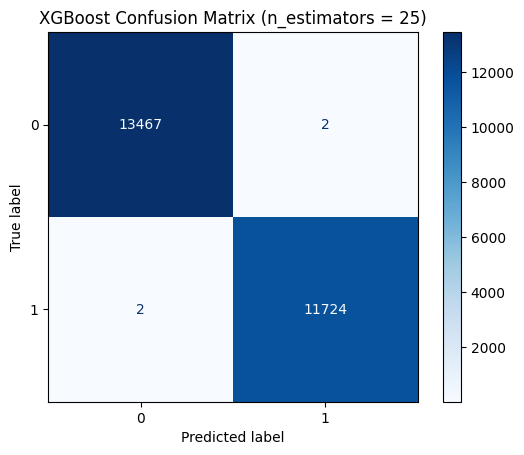

In [111]:
# Find the best model based on test accuracy
best_index = test_accuracy_scores.index(max(test_accuracy_scores))
best_n_estimators = n_estimators_list[best_index]
best_xgb_model = xgb_models_list[best_index]

print(f"Best n_estimators: {best_n_estimators}")
print(f"Best Test Accuracy: {test_accuracy_scores[best_index]:.4f}")

# Plot Confusion Matrix for best model
ConfusionMatrixDisplay.from_estimator(best_xgb_model, X_test, y_test, cmap="Blues")
plt.title(f"XGBoost Confusion Matrix (n_estimators = {best_n_estimators})")
plt.show()

# 4. Neural Network
A Neural Network (NN) is a computational model inspired by the structure of the human brain. It’s made up of layers of interconnected nodes (neurons) that learn to recognize patterns and make predictions.

It’s the foundation for many deep learning models, especially in image processing, time series analysis, natural language processing, and tabular data classification.

**Structure of a Neural Network**
1. Input Layer
Takes in features from the dataset (e.g., age, income, packet count, etc.)
2. Hidden Layer(s)
Applies transformations to the input using weights, biases, and activation functions (like ReLU, sigmoid). More layers = more complex representations
3. Output Layer
Outputs the prediction (e.g., class 0 or 1 for binary classification using sigmoid)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import joblib

# Define the model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict outputs (threshold at 0.5 to convert probabilities to class labels)
y_train_pred_nn = (nn_model.predict(X_train) > 0.5).astype(int)
y_test_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)

joblib.dump(nn_model, 'best_ann_model.pkl')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2520/2520 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9699 - loss: 0.0974 - val_accuracy: 0.9960 - val_loss: 0.0153
Epoch 2/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9956 - loss: 0.0230 - val_accuracy: 0.9982 - val_loss: 0.0104
Epoch 3/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9971 - loss: 0.0107 - val_accuracy: 0.9990 - val_loss: 0.0049
Epoch 4/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9976 - loss: 0.0123 - val_accuracy: 0.9987 - val_loss: 0.0054
Epoch 5/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9978 - loss: 0.0097 - val_accuracy: 0.9991 - val_loss: 0.0033
Epoch 6/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9982 - loss: 0.0092 - val_accuracy: 0.9992 - val_loss: 0.0027
Epoch 7/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9985 - loss: 0.0055 - val_accuracy: 0.9992 - val_loss: 0.0025
Epoch 8/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9986 - loss: 0.0056 - val_acc

['best_ann_model.pkl']

In [101]:
joblib.dump(nn_model, 'best_nn_model.pkl')

['best_nn_model.pkl']

Train Accuracy (Neural Net): 0.9994
Test Accuracy (Neural Net): 0.9994


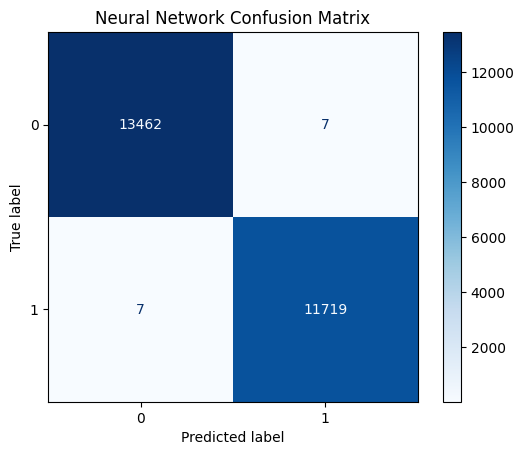

In [102]:
# Accuracy
train_acc_nn = accuracy_score(y_train, y_train_pred_nn)
test_acc_nn = accuracy_score(y_test, y_test_pred_nn)

print(f"Train Accuracy (Neural Net): {train_acc_nn:.4f}")
print(f"Test Accuracy (Neural Net): {test_acc_nn:.4f}")

# Confusion Matrix (Test)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_nn, cmap='Blues')
plt.title("Neural Network Confusion Matrix")
plt.show()

# 5. CNN for Time-Series
While CNNs (Convolutional Neural Networks) are typically associated with image processing, they are very effective for time-series data as well — especially for pattern detection and feature extraction from temporal sequences.

Why Use CNN for Time-Series?

CNNs can:
- Automatically extract local patterns (e.g., spikes, trends)
- Handle multivariate time-series well
- Are faster to train than RNNs/LSTMs
- Work well for classification tasks (e.g., anomaly detection, signal classification, intrusion detection like NSL-KDD)

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Reshape X_train and X_test for CNN input (samples, timesteps, features)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict outputs (threshold at 0.5)
y_train_pred_cnn = (cnn_model.predict(X_train_cnn) > 0.5).astype(int)
y_test_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype(int)

# Save the model
joblib.dump(cnn_model, "best_cnn_model.pkl")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2520/2520 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9653 - loss: 0.1319 - val_accuracy: 0.9935 - val_loss: 0.0172
Epoch 2/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9925 - loss: 0.0246 - val_accuracy: 0.9972 - val_loss: 0.0106
Epoch 3/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9956 - loss: 0.0166 - val_accuracy: 0.9985 - val_loss: 0.0050
Epoch 4/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9964 - loss: 0.0110 - val_accuracy: 0.9988 - val_loss: 0.0050
Epoch 5/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.9971 - loss: 0.0104 - val_accuracy: 0.9992 - val_loss: 0.0038
Epoch 6/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9975 - loss: 0.0125 - val_accuracy: 0.9991 - val_loss: 0.0039
Epoch 7/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9984 - loss: 0.0058 - val_accuracy: 0.9993 - val_loss: 0.0029
Epoch 8/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9982 - loss: 0.0066 - val

['best_cnn_model.pkl']

Train Accuracy (CNN): 0.9995
Test Accuracy (CNN): 0.9995


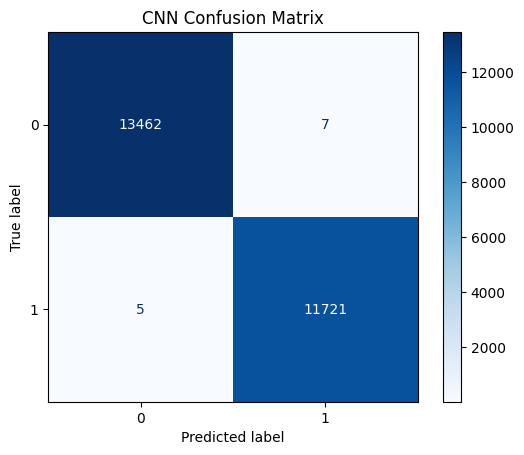

In [107]:
# Accuracy
train_acc_cnn = accuracy_score(y_train, y_train_pred_cnn)
test_acc_cnn = accuracy_score(y_test, y_test_pred_cnn)

print(f"Train Accuracy (CNN): {train_acc_cnn:.4f}")
print(f"Test Accuracy (CNN): {test_acc_cnn:.4f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_cnn, cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.show()

# **Load the Models**

Why This is Important
- **Persistence**: You can reuse trained models later without retraining.
- **Efficiency**: Useful in deployment pipelines or production systems.
- **Evaluation**: Compare performance of models across different runs or on new data.

In [108]:
# Load pre-trained models
lr_model = joblib.load('best_logistic_model.pkl')
rf_model = joblib.load('best_random_forest_model.pkl')
xgb_model = joblib.load('best_xgboost_model.pkl')
ann_model = joblib.load('best_nn_model.pkl')  # Keras model saved with joblib (non-standard)
cnn_model = joblib.load('best_cnn_model.pkl')  # Keras model saved with joblib (non-standard)

new_data = X_test[:5]  # or any 5 samples with same features as your training data

# Assume new_data is preprocessed and scaled correctly for each model
# For ANN and other 2D models
y_pred_lr = lr_model.predict(new_data)
y_pred_rf = rf_model.predict(new_data)
y_pred_xgb = xgb_model.predict(new_data)
y_pred_ann = (ann_model.predict(new_data) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 36s 36s/step
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


**Why Load a Model?**

Once you’ve trained and saved your machine learning models (like Logistic Regression, Random Forest, XGBoost, ANN, CNN), you don’t need to retrain them every time. Instead, you can load the saved models and use them to predict new unseen data. This is especially useful in real-world applications like production systems, automation, or batch processing.

In [113]:
# Predict using 2D models

y_pred_lr = lr_model.predict(new_data)
y_pred_rf = rf_model.predict(new_data)
y_pred_xgb = xgb_model.predict(new_data)
y_pred_ann = (ann_model.predict(new_data) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [114]:
# For CNN, reshape new_data to 3D: (samples, timesteps, features)
new_data_cnn = new_data.reshape(new_data.shape[0], new_data.shape[1], 1)

#new_data_cnn.shape
y_pred_cnn = (cnn_model.predict(X_train_cnn) > 0.5).astype(int)

3150/3150 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [119]:
# Print predictions for 5 samples
print("Logistic Regression:", y_pred_lr)
print("Random Forest:", y_pred_rf)
print("XGBoost:", y_pred_xgb)
print("ANN:", y_pred_ann.ravel())
print("CNN:", y_pred_cnn.ravel())
new_data_cnn.shape

Logistic Regression: [1 0 1 1 0]
Random Forest: [1 0 1 1 0]
XGBoost: [1 0 1 1 0]
ANN: [1 0 1 1 0]
CNN: [0 0 0 ... 0 0 1]


(5, 20, 1)

#🎉 Congratulations! 🎉

You’ve successfully completed a comprehensive supervised learning pipeline for network intrusion or classification detection using the NSL-KDD dataset (or your dataset of choice).

✅ Starting with data preprocessing, you skillfully cleaned, scaled, and transformed your data into a machine-readable format.
✅ You then trained multiple supervised learning models, including:
- 📈 Logistic Regression — a solid baseline model for binary classification tasks.
- 🌲 Random Forest — an ensemble method that improves accuracy by reducing overfitting.
- 🚀 XGBoost — a powerful gradient boosting algorithm known for speed and performance.
- 🧠 Artificial Neural Network (ANN) — able to capture complex, nonlinear relationships in the data.
- 📊 Convolutional Neural Network (CNN) — adapted for 1D time-series analysis, giving strong results on structured data.

💾 You didn’t stop there — you saved all your trained models using .pkl files so they can be reused without retraining.
📤 Finally, you loaded your models to make predictions on new data, ensuring your system can operate in real-time or production environments.